# Machine Learning Models for stock prediction - non transformation version

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

## Import data

The data was downloaded from Bloomberg on:
* Exchange rate of Vietnam with its major trading partners: the China and the US
* Precious metal spot price and future price: Gold, Silver, Palladium, Platinum
* Global Stock Indices: Hang Seng Index, Nasdaq 100, Nasdaq Composite, Nikkei 225, SP500, DOJI, Shanghai Shenzhen CSI3000, Shanghai Shenzhen Composite and Singapore Stock Index
* Volatility stock index: VIX Index

The data will be imported from previous EDA session, which has been cleaned.

In [2]:
# Import data
data = pd.read_csv('data.csv')

# Transfer date column to date time
import datetime
data['Date'] = pd.to_datetime(data['Date'], format = '%m/%d/%Y')

# Turn date into index
data.set_index('Date', inplace = True)

# Feature Extraction

We will generate the following set of features:
- Return of n lag days
- Lags price of n lag days
- Diff price of n lag days

In [3]:
# Generate lag function

def generate_lag(df, n_lags):
    """
    Generate n lag for each columns of the dataframe
    
    """
     # df_copy
    df2 = df.copy()
    
    # Create column list
    new_columns = []
    
    # Define n_lags:
    lag_range = range(1, n_lags + 1)
    
    # Generate new columns with lags
    for col in df2.columns:
        for i in lag_range:
            new_col_name = f"{col}_lag_{i}"
            df2[new_col_name] = df2[col].shift(periods = i)
            new_columns.append(new_col_name)
    
    return df2[new_columns]

In [4]:
# Generate return
def generate_return(df, n_lags):
    """
    Generate n lag return for each columns of the dataframe
    
    """
    # df_copy
    df2 = df.copy()
    
    # Create column list
    new_columns = []
    
    # Define lag range
    lag_range = range(1, n_lags + 1)
    
    # Generate new columns with lags
    for col in df2.columns:
        for i in lag_range:
            new_col_name = f"{col}_return_{i}"
            df2[new_col_name] = df2[col].pct_change(periods = i)
            new_columns.append(new_col_name)
    
    return df2[new_columns]

In [5]:
# Generate diff
def generate_diff(df, n_lags):
    """
    Generate n lag diff for each columns of the dataframe
    
    """
     # df_copy
    df2 = df.copy()
    
    # Create column list
    new_columns = []
    
    # Define n_lags:
    lag_range = range(1, n_lags + 1)
    
    # Generate new columns with lags
    for col in df2.columns:
        for i in lag_range:
            new_col_name = f"{col}_diff_{i}"
            df2[new_col_name] = df2[col].diff(periods = i)
            new_columns.append(new_col_name)
    
    return df2[new_columns]

In [6]:
# Generate lag
data_lag = generate_lag(data, 5)
data_ret = generate_return(data, 5)
data_diff = generate_diff(data, 5)

In [7]:
# Merge all of dataframes into one big data
data_features = pd.concat([data, data_lag, data_ret, data_diff], axis = 1)
data_features.head()

,index_sp500,spot_palladium,index_shsz_csi300,index_vni,index_sp500_lag_1,index_sp500_lag_2,index_sp500_lag_3,index_sp500_lag_4,index_sp500_lag_5,spot_palladium_lag_1,...,index_shsz_csi300_diff_1,index_shsz_csi300_diff_2,index_shsz_csi300_diff_3,index_shsz_csi300_diff_4,index_shsz_csi300_diff_5,index_vni_diff_1,index_vni_diff_2,index_vni_diff_3,index_vni_diff_4,index_vni_diff_5
Date,,,,,,,,,,,,,,,,,,,,,
2007-07-02,1519.43,368.5,16130,994.17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-03,1524.87,365.0,16131,977.30,1519.43,NaN,NaN,NaN,NaN,368.5,...,1.0,NaN,NaN,NaN,NaN,-16.87,NaN,NaN,NaN,NaN
2007-07-04,1522.19,366.0,16130,1013.56,1524.87,1519.43,NaN,NaN,NaN,365.0,...,-1.0,0.0,NaN,NaN,NaN,36.26,19.39,NaN,NaN,NaN
2007-07-05,1525.40,365.5,16130,1012.82,1522.19,1524.87,1519.43,NaN,NaN,366.0,...,0.0,-1.0,0.0,NaN,NaN,-0.74,35.52,18.65,NaN,NaN
2007-07-06,1530.44,367.0,16135,1010.53,1525.40,1522.19,1524.87,1519.43,NaN,365.5,...,5.0,5.0,4.0,5.0,NaN,-2.29,-3.03,33.23,16.36,NaN


In [8]:
# Drop missing values
data_features = data_features.iloc[10:]

In [9]:
data_features.head()

,index_sp500,spot_palladium,index_shsz_csi300,index_vni,index_sp500_lag_1,index_sp500_lag_2,index_sp500_lag_3,index_sp500_lag_4,index_sp500_lag_5,spot_palladium_lag_1,...,index_shsz_csi300_diff_1,index_shsz_csi300_diff_2,index_shsz_csi300_diff_3,index_shsz_csi300_diff_4,index_shsz_csi300_diff_5,index_vni_diff_1,index_vni_diff_2,index_vni_diff_3,index_vni_diff_4,index_vni_diff_5
Date,,,,,,,,,,,,,,,,,,,,,
2007-07-16,1549.52,367.50,16130,995.83,1552.50,1547.70,1518.76,1510.12,1531.85,368.13,...,0.0,0.0,-2.0,-3.0,-4.0,-19.90,-21.85,-34.02,-27.21,-14.44
2007-07-17,1549.37,364.50,16130,1000.33,1549.52,1552.50,1547.70,1518.76,1510.12,367.50,...,0.0,0.0,0.0,-2.0,-3.0,4.50,-15.40,-17.35,-29.52,-22.71
2007-07-18,1546.17,368.75,16135,994.73,1549.37,1549.52,1552.50,1547.70,1518.76,364.50,...,5.0,5.0,5.0,5.0,3.0,-5.60,-1.10,-21.00,-22.95,-35.12
2007-07-19,1553.08,371.13,16140,984.43,1546.17,1549.37,1549.52,1552.50,1547.70,368.75,...,5.0,10.0,10.0,10.0,10.0,-10.30,-15.90,-11.40,-31.30,-33.25
2007-07-20,1534.10,372.00,16137,981.31,1553.08,1546.17,1549.37,1549.52,1552.50,371.13,...,-3.0,2.0,7.0,7.0,7.0,-3.12,-13.42,-19.02,-14.52,-34.42


# Machine Learning models - Regression

We will perform the test on several models to determine which models will perform best. The models are:
- Linear Regression (include Ridge and Lasso for avoid multicolinearity)
- Decision Trees Regressor
- Gradient Boosting Regressor
- XGBoost Regressor

## Train test split - 70% 20% 10%

In [10]:
# Define train test split
def train_test_split(df, target):
    # Define train, cv, test time
    train_time = int(round(len(df) * 0.7))
    cv_time = int(round(len(df) * 0.1))
    
    # Define X, y
    X = df.drop(target, axis = 1)
    y = df[target]
    
    # Train test split
    X_train = X.iloc[:train_time]
    X_cv = X.iloc[train_time : (train_time + cv_time)]
    X_test = X.iloc[(train_time + cv_time):]
    
    y_train = y.iloc[:train_time]
    y_cv = y.iloc[train_time : (train_time + cv_time)]
    y_test = y.iloc[(train_time + cv_time):]
    
    # Print out to check shape
    print(X_train.shape)
    print(X_cv.shape)
    print(X_test.shape)
    
    print(y_train.shape)
    print(y_cv.shape)
    print(y_test.shape)
    
    return X_train, y_train, X_cv, y_cv, X_test, y_test

In [11]:
# Train test split the dataset
X_train, y_train, X_cv, y_cv, X_test, y_test = train_test_split(data, 'index_vni')

(2922, 3)
(418, 3)
(835, 3)
(2922,)
(418,)
(835,)


In [12]:
# Import scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

## Prepare models

We will prepare regression models. We will fit on non-tuned models first to see the model, then based on the result, we will perform further hyperparameters tunning if needed

In [13]:
# Import model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [14]:
# Call out object
lr = LinearRegression()
ridge = Ridge(alpha = 15)
lasso = Lasso(alpha = 20)
dtr = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 10, min_samples_split = 4)
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
rf = RandomForestRegressor(criterion = 'squared_error', max_depth = 10, min_samples_split = 4)
svr = SVR()

# Set models list
models = [lr, ridge, lasso, dtr, gb, xgb, rf, svr]

## Test models

In [15]:
# Import metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

def rmse(mse):
    rmse = np.sqrt(mse)

In [16]:
# Define evaluate model
def evaluate_model(model, X_train, y_train, X_cv, y_cv):
    # Fit model and obtain result
    model.fit(X_train, y_train)
    y_pred_cv = model.predict(X_cv)
    MAE = mae(y_cv, y_pred_cv)
    MSE = mse(y_cv, y_pred_cv)
    RMSE = rmse(MSE)

    # Store result
    return MAE, MSE, RMSE

In [17]:
# Test the model

col = ['Linear Regression','Ridge','Lasso','Decision Tree','Gradient Boosting','XGBoost','Random Forest', 'SVR']
MAE_cv = []
MSE_cv = []

for model in models:
    MAE, MSE, RMSE = evaluate_model(model, X_train_scaled, y_train, X_cv_scaled, y_cv)
    MAE_cv.append(MAE)
    MSE_cv.append(MSE)

cv_result = pd.DataFrame(data = [MAE_cv, MSE_cv], columns = [col], index = ['MAE','MSE'])
cv_result.T.sort_values(by = 'MAE')

,MAE,MSE
XGBoost,37.631431,3724.407643
Gradient Boosting,40.146163,3511.689172
Random Forest,43.984938,3633.418625
Decision Tree,48.443649,4061.509166
Lasso,87.663947,9232.927680
Ridge,99.689838,19937.125148
Linear Regression,102.658798,21204.551532
SVR,282.469156,88167.310159


XGBoost Regressor has the lowest error, and shows potentials to tunning for more. Furthermore, we just simply fit scaled data without any feature extraction.

## Test with feature extraction data

In [18]:
# Train test split data
X_train, y_train, X_cv, y_cv, X_test, y_test = train_test_split(data_features, 'index_vni')

(2916, 63)
(416, 63)
(833, 63)
(2916,)
(416,)
(833,)


In [19]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()

X_train_scaled = scaler_minmax.fit_transform(X_train)
X_cv_scaled = scaler_minmax.transform(X_cv)
X_test_scaled = scaler_minmax.transform(X_test)

In [20]:
# Test with models
col = ['Linear Regression','Ridge','Lasso','Decision Tree','Gradient Boosting','XGBoost','Random Forest', 'SVR']
MAE_cv = []
MSE_cv = []

for model in models:
    MAE, MSE, RMSE = evaluate_model(model, X_train_scaled, y_train, X_cv_scaled, y_cv)
    MAE_cv.append(round(MAE, 3))
    MSE_cv.append(round(MSE,3))

cv_result = pd.DataFrame(data = [MAE_cv, MSE_cv], columns = [col], index = ['MAE','MSE'])
cv_result.T.sort_values(by = 'MAE')

,MAE,MSE
Linear Regression,0.000,0.000
Gradient Boosting,3.608,22.996
Random Forest,4.557,59.174
XGBoost,6.803,84.037
Decision Tree,7.459,122.779
Ridge,9.359,172.332
Lasso,188.788,36979.376
SVR,242.936,65213.441


We will test again without scaling but the absolute values of the input features 

In [21]:
# Test with models with non-scaling features
col = ['Linear Regression','Ridge','Lasso','Decision Tree','Gradient Boosting','XGBoost','Random Forest', 'SVR']
MAE_cv = []
MSE_cv = []

for model in models:
    MAE, MSE, RMSE = evaluate_model(model, X_train, y_train, X_cv, y_cv)
    MAE_cv.append(round(MAE, 3))
    MSE_cv.append(round(MSE,3))

cv_result = pd.DataFrame(data = [MAE_cv, MSE_cv], columns = [col], index = ['MAE','MSE'])
cv_result.T.sort_values(by = 'MAE')

,MAE,MSE
Linear Regression,0.000,0.000
Ridge,0.000,0.000
Lasso,1.259,3.631
Gradient Boosting,3.639,23.377
Random Forest,4.560,59.998
XGBoost,6.803,84.037
Decision Tree,7.630,135.861
SVR,373.278,143997.595


Non-scaling input gives us better result for stock prediction. All models give very good result, only XGBoost and Decision Tree Regressor give a quite high error. Linear Regression and Ridge seems to perform the best, however, this could be a sign of overfitting, and cross-validation dataset only contains 10% of the total data points. We will predict the model on test dataset

In [22]:
# Test with models with non-scaling features
col = ['Linear Regression','Ridge','Lasso','Decision Tree','Gradient Boosting','XGBoost','Random Forest','SVR']
MAE_cv = []
MSE_cv = []

for model in models:
    MAE, MSE, RMSE = evaluate_model(model, X_train, y_train, X_test, y_test)
    MAE_cv.append(round(MAE, 3))
    MSE_cv.append(round(MSE,3))

cv_result = pd.DataFrame(data = [MAE_cv, MSE_cv], columns = [col], index = ['MAE','MSE'])
cv_result.T.sort_values(by = 'MAE')

,MAE,MSE
Linear Regression,0.000,0.000
Ridge,0.000,0.000
Lasso,2.167,10.306
Gradient Boosting,79.860,17463.137
XGBoost,90.395,20506.552
Random Forest,95.562,23112.419
Decision Tree,103.865,25107.650
SVR,588.093,386852.314


Linear and Ridge regression still performed very well even without scaling. Now we will test on scaled data

In [23]:
# Test with models with non-scaling features
col = ['Linear Regression','Ridge','Lasso','Decision Tree','Gradient Boosting','XGBoost','Random Forest','SVR']
MAE_cv = []
MSE_cv = []

for model in models:
    MAE, MSE, RMSE = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    MAE_cv.append(round(MAE, 3))
    MSE_cv.append(round(MSE,3))

cv_result = pd.DataFrame(data = [MAE_cv, MSE_cv], columns = [col], index = ['MAE','MSE'])
cv_result.T.sort_values(by = 'MAE')

,MAE,MSE
Linear Regression,0.000,0.000
Ridge,32.411,1133.312
Gradient Boosting,80.062,17528.223
XGBoost,90.395,20506.552
Random Forest,95.329,22954.492
Decision Tree,102.249,24595.731
Lasso,304.439,103946.772
SVR,546.902,342106.246


With the scaled data, the Linear Regression still gives excellent result, with almost no different from actual price. But there is a thing should be notice here is that the Ridge model, which is basically Linear model with added penalty to avoid overfitting, gives extremely high result.

In [24]:
# Get visualization
def get_pred(model, X_train, y_train, X_cv, y_cv, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Obtain prediction
    y_pred_train = model.predict(X_train)
    y_pred_cv = model.predict(X_cv)
    y_pred_test = model.predict(X_test)
    
    y_pred_model = np.concatenate([y_pred_train, y_pred_cv, y_pred_test], axis = None)
    
    return y_pred_model

In [25]:
# Obtain prediction of 3 linear models
y_pred_lr = get_pred(lr, X_train, y_train, X_cv, y_cv, X_test, y_test)
y_pred_ridge = get_pred(ridge, X_train, y_train, X_cv, y_cv, X_test, y_test)
y_pred_lasso = get_pred(lasso, X_train, y_train, X_cv, y_cv, X_test, y_test)
y = data['index_vni'].iloc[10:]

# Turn into dataframe
y_pred_lr = pd.DataFrame(data = y_pred_lr, index = y.index)
y_pred_ridge = pd.DataFrame(data = y_pred_ridge, index = y.index)
y_pred_lasso = pd.DataFrame(data = y_pred_lasso, index = y.index)
y = data['index_vni'].iloc[10:]

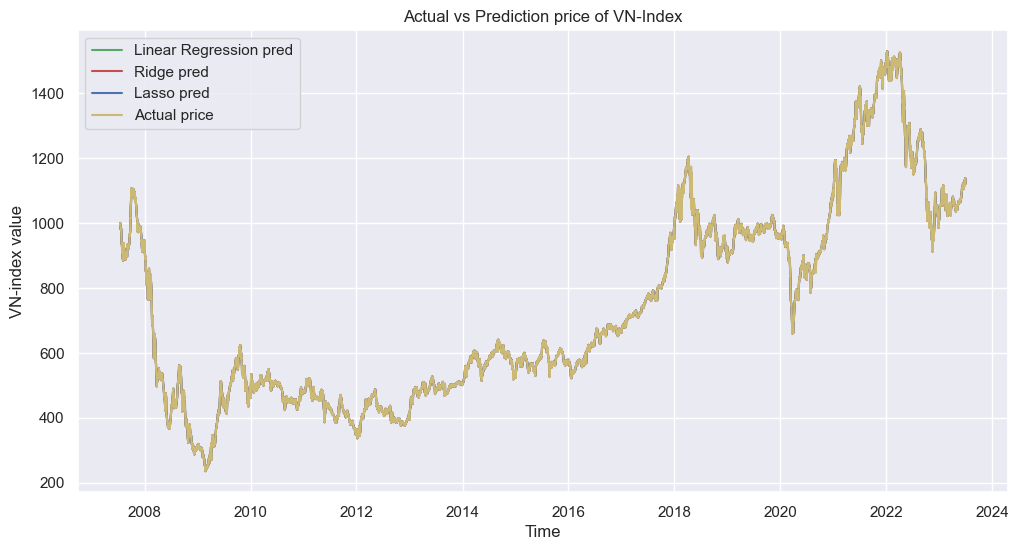

In [26]:
# Visualize prediction

fig, ax = plt.subplots(figsize = (12,6))

ax.plot(y_pred_lr, color = 'g', label = 'Linear Regression pred')
ax.plot(y_pred_ridge, color = 'r', label = 'Ridge pred')
ax.plot(y_pred_lasso, color = 'b', label = 'Lasso pred')
ax.plot(y, color = 'y', label = 'Actual price')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('VN-index value')
ax.set_title('Actual vs Prediction price of VN-Index')
plt.show()

The linear models (including Lasso and Ridge) runs perfectly well. This could indicates that we might gone somewhere wrong. In reality, if we can have a model like this we would have been super rich already. The problem might be from from the diff and return generation.

We generate return and price different on the test and cv data, so basically what we have done is to bring future values back to the past, and use the data to again, predict the future. That's why linear models have a outstanding predictions, but in reality it won't happen like that.

This notebook is purely for experiement and testing. Please be aware of this problem for your next feature extraction.

Let's take a closer look at a shorter time frame

In [27]:
# Slice to get closer time
start = datetime.datetime(2023,1,1)
end = datetime.datetime(2023,6,30)

# Slice the frame
y_slice = y.loc[start:end]
y_pred_lr_slice = y_pred_lr.loc[start:end]
y_pred_ridge_slice = y_pred_ridge.loc[start:end]
y_pred_lasso_slice = y_pred_lasso.loc[start:end]

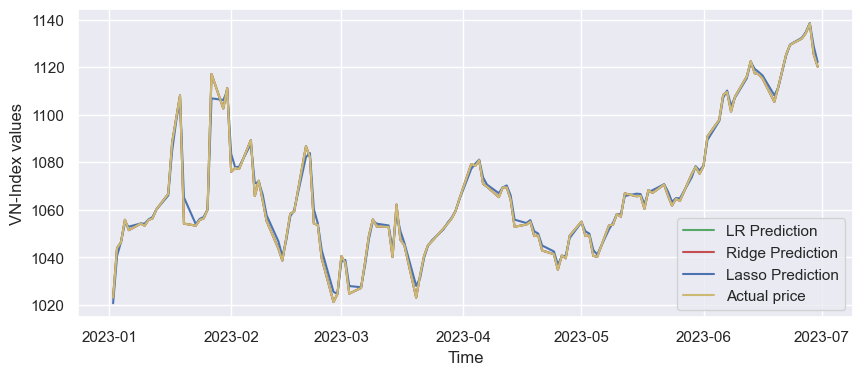

In [28]:
# Visualize
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(y_pred_lr_slice, color = 'g', label = 'LR Prediction')
ax.plot(y_pred_ridge_slice, color = 'r', label = 'Ridge Prediction')
ax.plot(y_pred_lasso_slice, color = 'b', label = 'Lasso Prediction')
ax.plot(y_slice, color = 'y', label = 'Actual price')
ax.set_xlabel('Time')
ax.set_ylabel('VN-Index values')
ax.legend()
plt.show()

So there are some error, but the prediction from the model replicates pretty well the movement of VN-index.

# Test with lag only

To avoid generate features from future back to the past to predict

In [29]:
# Generate data lag with 15 lag
data_lag = generate_lag(data, 15)

# Concatenate it with original data
data_lag_feat = pd.concat([data, data_lag], axis = 1)
data_lag_feat = data_lag_feat.iloc[15:]

# Check data
data_lag_feat.head()

,index_sp500,spot_palladium,index_shsz_csi300,index_vni,index_sp500_lag_1,index_sp500_lag_2,index_sp500_lag_3,index_sp500_lag_4,index_sp500_lag_5,index_sp500_lag_6,...,index_vni_lag_6,index_vni_lag_7,index_vni_lag_8,index_vni_lag_9,index_vni_lag_10,index_vni_lag_11,index_vni_lag_12,index_vni_lag_13,index_vni_lag_14,index_vni_lag_15
Date,,,,,,,,,,,,,,,,,,,,,
2007-07-23,1541.57,369.75,16137,979.23,1534.10,1553.08,1546.17,1549.37,1549.52,1552.50,...,1015.73,1017.68,1029.85,1023.04,1010.27,1010.53,1012.82,1013.56,977.30,994.17
2007-07-24,1511.04,366.38,16141,982.43,1541.57,1534.10,1553.08,1546.17,1549.37,1549.52,...,995.83,1015.73,1017.68,1029.85,1023.04,1010.27,1010.53,1012.82,1013.56,977.30
2007-07-25,1518.09,361.80,16135,972.56,1511.04,1541.57,1534.10,1553.08,1546.17,1549.37,...,1000.33,995.83,1015.73,1017.68,1029.85,1023.04,1010.27,1010.53,1012.82,1013.56
2007-07-26,1482.67,364.50,16142,956.13,1518.09,1511.04,1541.57,1534.10,1553.08,1546.17,...,994.73,1000.33,995.83,1015.73,1017.68,1029.85,1023.04,1010.27,1010.53,1012.82
2007-07-27,1458.95,361.50,16140,940.36,1482.67,1518.09,1511.04,1541.57,1534.10,1553.08,...,984.43,994.73,1000.33,995.83,1015.73,1017.68,1029.85,1023.04,1010.27,1010.53


In [30]:
# Train test split the data
X_train, y_train, X_cv, y_cv, X_test, y_test = train_test_split(data_lag_feat, 'index_vni')

(2912, 63)
(416, 63)
(832, 63)
(2912,)
(416,)
(832,)


In [31]:
# Create scaling version:
X_train_scaled = scaler_minmax.fit_transform(X_train)
X_cv_scaled = scaler_minmax.transform(X_cv)
X_test_scaled = scaler_minmax.transform(X_test)

In [32]:
# Test model with non-scaling feature
col = ['Linear Regression','Ridge','Lasso','Decision Tree','Gradient Boosting','XGBoost','Random Forest','SVR']
MAE_cv = []
MSE_cv = []

for model in models:
    MAE, MSE, RMSE = evaluate_model(model, X_train, y_train, X_cv, y_cv)
    MAE_cv.append(round(MAE, 3))
    MSE_cv.append(round(MSE,3))

cv_result = pd.DataFrame(data = [MAE_cv, MSE_cv], columns = [col], index = ['MAE','MSE'])
cv_result.T.sort_values(by = 'MAE')

,MAE,MSE
Lasso,6.436,92.952
Linear Regression,6.758,95.934
Ridge,6.758,95.930
Random Forest,11.800,245.534
Gradient Boosting,12.009,243.589
XGBoost,15.022,355.122
Decision Tree,18.672,535.895
SVR,365.308,138180.819


Linear models remain the best models in predicting. The MAE is slightly high, around above 6. However, I consider this model better than previous models with diff and return, as it can reveal information into the future.

We will test on scaled version

In [33]:
# Test model with non-scaling feature
col = ['Linear Regression','Ridge','Lasso','Decision Tree','Gradient Boosting','XGBoost','Random Forest','SVR']
MAE_cv = []
MSE_cv = []

for model in models:
    MAE, MSE, RMSE = evaluate_model(model, X_train_scaled, y_train, X_cv_scaled, y_cv)
    MAE_cv.append(round(MAE, 3))
    MSE_cv.append(round(MSE,3))

cv_result = pd.DataFrame(data = [MAE_cv, MSE_cv], columns = [col], index = ['MAE','MSE'])
cv_result.T.sort_values(by = 'MAE')

,MAE,MSE
Linear Regression,6.758,95.934
Random Forest,11.352,228.931
Gradient Boosting,12.631,254.628
Ridge,14.913,422.631
XGBoost,15.021,355.093
Decision Tree,18.523,519.619
Lasso,189.702,37355.157
SVR,230.221,60989.705


Linear Regression models continue to be the best model in predicting, and the error is not very different from the non-scaled version. This result is more trusted, as it has a decent MAE and MSE (though not yet very accurate and can be tunning for better result). In reality, the stock market is very hard to predict accurately.

In [34]:
# Get prediction of linear model
lr_pred = get_pred(lr, X_train, y_train, X_cv, y_cv, X_test, y_test)

lr_pred = pd.DataFrame(data = lr_pred)
lr_pred.index = data['index_vni'].iloc[15:].index

# Get y
y = data['index_vni'].iloc[15:]

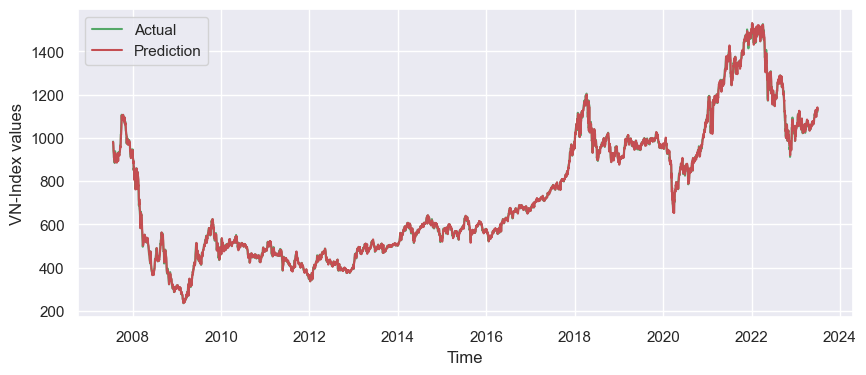

In [35]:
# Visualize
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(y, color = 'g', label = 'Actual')
ax.plot(lr_pred, color = 'r', label = 'Prediction')
ax.set_xlabel('Time')
ax.set_ylabel('VN-Index values')
ax.legend()
plt.show()

The prediction of Linear Regression withlag value fit very well, and it does not bring the values of the future to the past and again predict the future.

We will take a closer look at shorter time frame to examine error of the model

In [36]:
# Define timeline
start = datetime.datetime(2023,1,1)
end = datetime.datetime(2023,6,30)

# Slice the frame
y_slice = y.loc[start:end]
lr_pred_slice = lr_pred.loc[start:end]

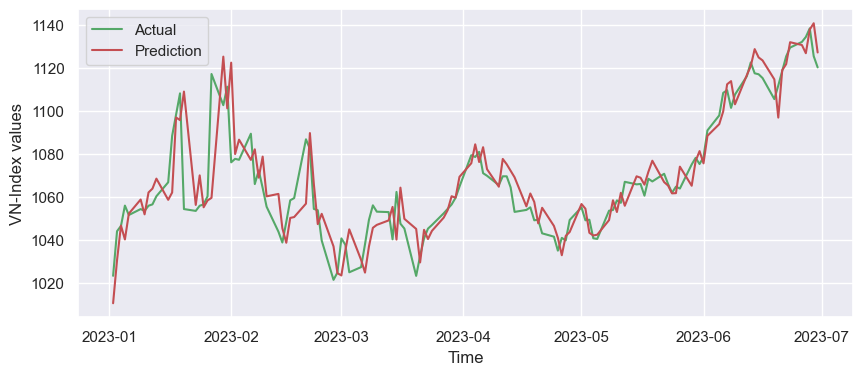

In [37]:
# Visualize
fig, ax = plt.subplots(figsize = (10,4))

ax.plot(y_slice, color = 'g', label = 'Actual')
ax.plot(lr_pred_slice, color = 'r', label = 'Prediction')
ax.set_xlabel('Time')
ax.set_ylabel('VN-Index values')
ax.legend()
plt.show()

The model replicate pretty much accurate the movement of the actual VN-Index price. We can conclude that a simple Linear Regression model can effectively predict the stock price.